# 加窗傅里叶变换实现

In [1]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import interpolate
%matplotlib inline
np.set_printoptions(suppress=True, threshold=np.nan)

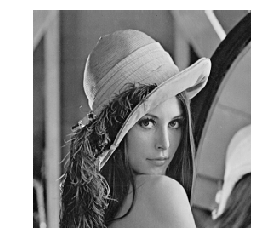

(256, 256)


In [2]:
#img = cv2.imread('.\\data\\5.3.01.tiff',0)
img1 = cv2.imread('.\\data\\lena.jpg')
img1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img_cp = img1.copy()

plt.imshow(img1,cmap = 'gray')
plt.axis("off")#去除坐标轴
plt.show()

print(img1.shape)

## 二维高斯函数实现

In [3]:
def gaussian_kernel_2d_opencv(kernel_size = 5,sigma = 2):
    kx = cv2.getGaussianKernel(kernel_size,sigma)
    ky = cv2.getGaussianKernel(kernel_size,sigma)
    return np.dot(kx,np.transpose(ky)) 


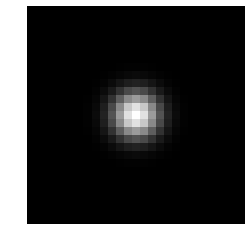

(27, 27)


In [4]:
fil = gaussian_kernel_2d_opencv(21,2)

fil = np.pad(fil,((3,3),(3,3)),'constant', constant_values=(0,0))
plt.imshow(fil,cmap = 'gray')
plt.axis("off")#去除坐标轴
plt.show()
print(fil.shape)

## 在图像上选奇异点进行加窗傅里叶变换，并将结果显示

(Text(0.5, 1.0, 'dst'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

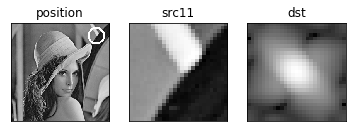

In [5]:
src1 = img1[22:49,207:234]

dst1 = src1 * fil

f1 = np.fft.fft2(dst1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum = np.log(np.abs(fshift1))

#显示结果
plt.subplot(131),plt.imshow(cv2.circle(img1.copy(), ( 220,35), 20, (255,255,255), 3), cmap = 'gray')
plt.title('position'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(src1, cmap = 'gray')
plt.title('src11'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum,cmap = 'gray')
plt.title('dst'), plt.xticks([]), plt.yticks([])

## 在图像上选择平滑点进行加窗傅里叶变换，并将结果进行对比

(Text(0.5, 1.0, 'dst'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

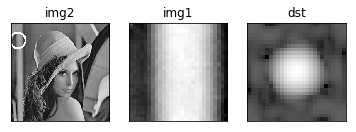

In [6]:
src2 = img1[37:64,7:34]

dst2 = src2 * fil

f2 = np.fft.fft2(dst2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = np.log(np.abs(fshift2))

plt.subplot(132),plt.imshow(src2, cmap = 'gray')
plt.title('img1'), plt.xticks([]), plt.yticks([])
plt.subplot(131),plt.imshow(cv2.circle(img1.copy(), ( 17,47), 20, (255,255,255), 3), cmap = 'gray')
plt.title('img2'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum2,cmap = 'gray')
plt.title('dst'), plt.xticks([]), plt.yticks([])

# 一维信号加窗傅里叶变换实现

## 产生一维信号

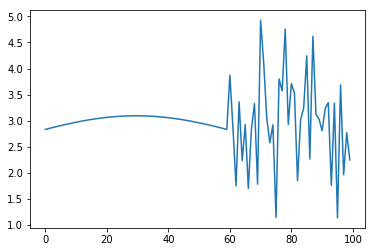

In [7]:
line1 = cv2.getGaussianKernel(60,40)*60 + 2
line2 = np.array(np.random.randn(40)) + 3
line= np.append(line1,line2)
plt.plot(line)  

## 产生窗函数

[0.         0.         0.         0.01605491 0.04364178 0.09238965
 0.15232478 0.19558888 0.19558888 0.15232478 0.09238965 0.04364178
 0.01605491 0.         0.         0.        ]
(16,)


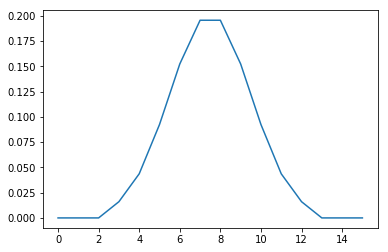

In [8]:
kx = cv2.getGaussianKernel(10,2)
zeros_pad = np.zeros((3,1))


fil_line =np.append(zeros_pad,kx)
fil_line =np.append(fil_line,zeros_pad)

plt.plot(fil_line)
print(fil_line)
print(fil_line.shape)

## 选择平滑点进行加窗傅里叶变换

(Text(0.5, 1.0, 'dst'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

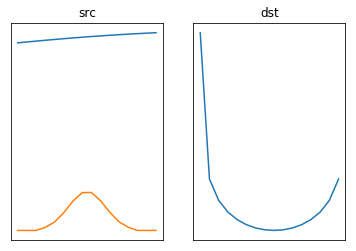

In [9]:
initial = 5

src3 = line[initial:initial + 16]
src3_fil = src3 * fil_line

dst3 = np.fft.fft(src3)

plt.subplot(121),plt.plot(src3),plt.plot(src3_fil)
plt.title('src'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.plot(np.log(np.abs(dst3)))
plt.title('dst'), plt.xticks([]), plt.yticks([])


## 选择奇异点进行加窗傅里叶变换

(Text(0.5, 1.0, 'dst'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

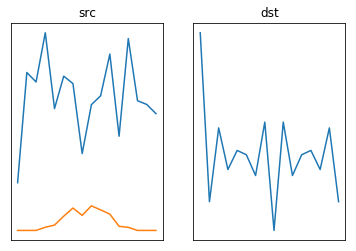

In [10]:
initial = 75

src3 = line[initial:initial + 16]
src3_fil = src3 * fil_line

dst3 = np.fft.fft(src3)

plt.subplot(121),plt.plot(src3),plt.plot(src3_fil)
plt.title('src'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.plot(np.log(np.abs(dst3)))
plt.title('dst'), plt.xticks([]), plt.yticks([])